<a href="https://colab.research.google.com/github/walidMohmmed1999/Veritabani-Proje/blob/main/Bitirme_Projem_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
import os

def delete_folder(folder_path):
    try:
        if os.path.exists(folder_path):
            shutil.rmtree(folder_path)
            print(f"Folder '{folder_path}' has been deleted successfully.")
        else:
            print(f"The folder '{folder_path}' does not exist.")
    except Exception as e:
        print(f"An error occurred while deleting the folder: {e}")

# Example usage:
folder_path = "/content/drive/MyDrive/DentalRadiographsDataset/Preprocessed"
delete_folder(folder_path)


Folder '/content/drive/MyDrive/DentalRadiographsDataset/Preprocessed' has been deleted successfully.


In [ ]:
import os


caries_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Caries/images"
healthy_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Healthy/images"


image_paths = []
labels = []

for filename in os.listdir(caries_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_paths.append(os.path.join(caries_path, filename))
        labels.append(1)

for filename in os.listdir(healthy_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_paths.append(os.path.join(healthy_path, filename))
        labels.append(0)


print(f"Total images: {len(image_paths)}")
print(f"Labels distribution: {labels.count(0)} Healthy, {labels.count(1)} Caries")


Total images: 193
Labels distribution: 93 Healthy, 100 Caries


In [ ]:
import os


healthy_augmented_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Augmented/Healthy"
caries_augmented_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Augmented/Caries"


healthy_count = len([f for f in os.listdir(healthy_augmented_path) if f.endswith(".png") or f.endswith(".jpg")])
caries_count = len([f for f in os.listdir(caries_augmented_path) if f.endswith(".png") or f.endswith(".jpg")])


total_count = healthy_count + caries_count


print(f"Number of augmented images:")
print(f"  Healthy: {healthy_count}")
print(f"  Caries: {caries_count}")
print(f"  Total: {total_count}")


Number of augmented images:
  Healthy: 2976
  Caries: 3000
  Total: 5976


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split


healthy_augmented_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Augmented/Healthy"
caries_augmented_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Augmented/Caries"


output_base_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/RandomSplit"
train_output_path = os.path.join(output_base_path, "Train")
val_output_path = os.path.join(output_base_path, "Validation")
test_output_path = os.path.join(output_base_path, "Test")


for split_path in [train_output_path, val_output_path, test_output_path]:
    os.makedirs(os.path.join(split_path, "Healthy"), exist_ok=True)
    os.makedirs(os.path.join(split_path, "Caries"), exist_ok=True)

all_data = []
for file_name in os.listdir(healthy_augmented_path):
    if file_name.endswith((".png", ".jpg")):
        all_data.append({"path": os.path.join(healthy_augmented_path, file_name), "label": 0})  # Healthy label = 0

for file_name in os.listdir(caries_augmented_path):
    if file_name.endswith((".png", ".jpg")):
        all_data.append({"path": os.path.join(caries_augmented_path, file_name), "label": 1})  # Caries label = 1


train_data, temp_data = train_test_split(all_data, test_size=0.3, random_state=42, stratify=[item["label"] for item in all_data])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=[item["label"] for item in temp_data])


def copy_files(data, destination_path):
    for item in data:
        label_folder = "Healthy" if item["label"] == 0 else "Caries"
        dest_folder = os.path.join(destination_path, label_folder)
        shutil.copy(item["path"], dest_folder)


copy_files(train_data, train_output_path)
copy_files(val_data, val_output_path)
copy_files(test_data, test_output_path)


print("Splitting complete!")
print(f"Train set: {len(train_data)} images")
print(f"Validation set: {len(val_data)} images")
print(f"Test set: {len(test_data)} images")


Splitting complete!
Train set: 4183 images
Validation set: 896 images
Test set: 897 images


In [ ]:
import os


random_split_base_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/RandomSplit"


splits = ["Train", "Validation", "Test"]
classes = ["Healthy", "Caries"]


for split in splits:
    print(f"\nChecking {split} split:")
    total_images = 0
    for class_name in classes:
        class_path = os.path.join(random_split_base_path, split, class_name)
        if os.path.exists(class_path):
            image_count = len([f for f in os.listdir(class_path) if f.endswith((".png", ".jpg"))])
            total_images += image_count
            print(f"  {class_name}: {image_count} images")
        else:
            print(f"  ❌ Missing folder: {class_path}")
    print(f"  Total images in {split}: {total_images}")



Checking Train split:
  Healthy: 2083 images
  Caries: 2100 images
  Total images in Train: 4183

Checking Validation split:
  Healthy: 446 images
  Caries: 450 images
  Total images in Validation: 896

Checking Test split:
  Healthy: 447 images
  Caries: 450 images
  Total images in Test: 897


In [ ]:
import os
import json


base_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/RandomSplit"
splits = ["Train", "Validation", "Test"]
classes = {"Healthy": 0, "Caries": 1}

dataset_metadata = {split: [] for split in splits}

for split in splits:
    for class_name, label in classes.items():
        class_path = os.path.join(base_path, split, class_name)
        for file_name in os.listdir(class_path):
            if file_name.endswith((".png", ".jpg")):
                file_path = os.path.join(class_path, file_name)
                dataset_metadata[split].append({"path": file_path, "label": label})


for split in splits:
    print(f"{split} dataset:")
    print(f"  Total images: {len(dataset_metadata[split])}")
    healthy_count = sum(1 for item in dataset_metadata[split] if item["label"] == 0)
    caries_count = sum(1 for item in dataset_metadata[split] if item["label"] == 1)
    print(f"  Healthy: {healthy_count}, Caries: {caries_count}")


metadata_path = "/content/drive/MyDrive/DentalRadiographsDataset/random_split_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(dataset_metadata, f)

print(f"Metadata saved to {metadata_path}")


Train dataset:
  Total images: 4183
  Healthy: 2083, Caries: 2100
Validation dataset:
  Total images: 896
  Healthy: 446, Caries: 450
Test dataset:
  Total images: 897
  Healthy: 447, Caries: 450
Metadata saved to /content/drive/MyDrive/DentalRadiographsDataset/random_split_metadata.json


In [ ]:
import cv2
import os
from tqdm import tqdm
import json


metadata_path = "/content/drive/MyDrive/DentalRadiographsDataset/random_split_metadata.json"
with open(metadata_path, "r") as f:
    dataset_metadata = json.load(f)


preprocessed_base_path = "/content/drive/MyDrive/DentalRadiographsDataset/Preprocessed/RandomSplit"
os.makedirs(preprocessed_base_path, exist_ok=True)


def preprocess_and_save(metadata, split_name):
    output_path = os.path.join(preprocessed_base_path, split_name)
    os.makedirs(output_path, exist_ok=True)
    for item in tqdm(metadata, desc=f"Processing {split_name} images"):

        img = cv2.imread(item["path"])
        if img is None:
            print(f"Error reading {item['path']}")
            continue

        img_resized = cv2.resize(img, (224, 224))

        img_normalized = img_resized / 255.0

        label_folder = "Healthy" if item["label"] == 0 else "Caries"
        split_output_path = os.path.join(output_path, label_folder)
        os.makedirs(split_output_path, exist_ok=True)
        file_name = os.path.basename(item["path"])
        output_file_path = os.path.join(split_output_path, file_name)
        cv2.imwrite(output_file_path, (img_normalized * 255).astype("uint8"))
    print(f"Finished preprocessing {split_name} images.")

for split in ["Train", "Validation", "Test"]:
    preprocess_and_save(dataset_metadata[split], split)

print("All images have been resized and normalized!")


Processing Train images: 100%|██████████| 4183/4183 [02:28<00:00, 28.11it/s]


Finished preprocessing Train images.


Processing Validation images: 100%|██████████| 896/896 [00:30<00:00, 29.07it/s]


Finished preprocessing Validation images.


Processing Test images: 100%|██████████| 897/897 [00:29<00:00, 29.92it/s]

Finished preprocessing Test images.
All images have been resized and normalized!


In [ ]:
import os
import cv2
import numpy as np

preprocessed_base_path = "/content/drive/MyDrive/DentalRadiographsDataset/Preprocessed/RandomSplit"

splits = ["Train", "Validation", "Test"]
classes = ["Healthy", "Caries"]

verification_results = {}

for split in splits:
    print(f"\nVerifying {split} split:")
    split_total = 0
    verification_results[split] = {}
    for class_name in classes:
        class_path = os.path.join(preprocessed_base_path, split, class_name)
        if not os.path.exists(class_path):
            print(f"  ❌ Missing folder: {class_path}")
            continue
        images = os.listdir(class_path)
        image_count = len(images)
        split_total += image_count
        verification_results[split][class_name] = image_count
        print(f"  ✅ {class_name}: {image_count} images")


        for img_name in images[:5]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"    ❌ Image {img_name} could not be read.")
                continue
            if img.shape[:2] != (224, 224):
                print(f"    ❌ Image {img_name} has incorrect dimensions: {img.shape[:2]}")
            if np.max(img) > 255 or np.min(img) < 0:
                print(f"    ❌ Image {img_name} has incorrect pixel range: Min={np.min(img)}, Max={np.max(img)}")
            else:
                print(f"    ✅ Image {img_name} is properly resized and normalized.")
    print(f"  Total images in {split}: {split_total}")

print("\nVerification Complete!")
for split in splits:
    print(f"{split} Summary:")
    for class_name in classes:
        print(f"  {class_name}: {verification_results[split].get(class_name, 0)} images")



Verifying Train split:
  ✅ Healthy: 2083 images
    ✅ Image healthy_024_aug_28.png is properly resized and normalized.
    ✅ Image healthy_081_aug_0.png is properly resized and normalized.
    ✅ Image healthy_022_aug_29.png is properly resized and normalized.
    ✅ Image healthy_026_aug_22.png is properly resized and normalized.
    ✅ Image healthy_031_aug_12.png is properly resized and normalized.
  ✅ Caries: 2100 images
    ✅ Image caries_051_aug_26.png is properly resized and normalized.
    ✅ Image caries_051_aug_20.png is properly resized and normalized.
    ✅ Image caries_035_aug_4.png is properly resized and normalized.
    ✅ Image caries_021_aug_25.png is properly resized and normalized.
    ✅ Image caries_017_aug_14.png is properly resized and normalized.
  Total images in Train: 4183

Verifying Validation split:
  ✅ Healthy: 446 images
    ✅ Image healthy_090_aug_6.png is properly resized and normalized.
    ✅ Image healthy_042_aug_27.png is properly resized and normalized.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
import json
import os

metadata_path = "/content/drive/MyDrive/DentalRadiographsDataset/random_split_metadata.json"
with open(metadata_path, "r") as f:
    dataset_metadata = json.load(f)

image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


class DentalDataset(Dataset):
    def __init__(self, metadata, transform=None):
        self.metadata = metadata
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):

        item = self.metadata[idx]
        img_path = item["path"]
        label = item["label"]


        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image not found at {img_path}")


        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


        if self.transform:
            image = self.transform(image)

        return image, label



train_dataset = DentalDataset(dataset_metadata["Train"], transform=image_transforms)
val_dataset = DentalDataset(dataset_metadata["Validation"], transform=image_transforms)
test_dataset = DentalDataset(dataset_metadata["Test"], transform=image_transforms)


batch_size = 32
num_workers = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

print(f"Train loader batches: {len(train_loader)}")
print(f"Validation loader batches: {len(val_loader)}")
print(f"Test loader batches: {len(test_loader)}")


Train dataset size: 4183
Validation dataset size: 896
Test dataset size: 897
Train loader batches: 131
Validation loader batches: 28
Test loader batches: 29


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


model = models.resnet18(pretrained=True)


model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 1),
    nn.Sigmoid()
)
model = model.to(device)

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)


def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_samples = 0

    for inputs, labels in tqdm(train_loader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)


        outputs = model(inputs)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        train_loss += loss.item() * inputs.size(0)
        predictions = (outputs > 0.5).float()
        train_correct += (predictions == labels).sum().item()
        total_samples += inputs.size(0)

    train_loss /= total_samples
    train_accuracy = train_correct / total_samples
    return train_loss, train_accuracy


def validate_epoch(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc="Validation"):
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate loss and accuracy
            val_loss += loss.item() * inputs.size(0)
            predictions = (outputs > 0.5).float()
            val_correct += (predictions == labels).sum().item()
            total_samples += inputs.size(0)

    val_loss /= total_samples
    val_accuracy = val_correct / total_samples
    return val_loss, val_accuracy


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")


        train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer)

        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion)


        scheduler.step()

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_resnet18_model.pth")
            print(f"Best model saved with Val Accuracy: {val_accuracy:.4f}")

    print("Training Complete!")
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")



train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10)


Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


Epoch 1/10


Validation: 100%|██████████| 28/28 [05:14<00:00, 11.23s/it]


Train Loss: 0.5656, Train Accuracy: 0.7181
Val Loss: 0.8655, Val Accuracy: 0.5915
Best model saved with Val Accuracy: 0.5915
Epoch 2/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]


Train Loss: 0.2890, Train Accuracy: 0.8752
Val Loss: 0.3093, Val Accuracy: 0.8850
Best model saved with Val Accuracy: 0.8850
Epoch 3/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]


Train Loss: 0.1621, Train Accuracy: 0.9359
Val Loss: 0.7314, Val Accuracy: 0.7310
Epoch 4/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.72it/s]


Train Loss: 0.1085, Train Accuracy: 0.9584
Val Loss: 0.1971, Val Accuracy: 0.9107
Best model saved with Val Accuracy: 0.9107
Epoch 5/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.79it/s]


Train Loss: 0.0791, Train Accuracy: 0.9682
Val Loss: 0.5573, Val Accuracy: 0.8426
Epoch 6/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.63it/s]


Train Loss: 0.0307, Train Accuracy: 0.9902
Val Loss: 0.0467, Val Accuracy: 0.9777
Best model saved with Val Accuracy: 0.9777
Epoch 7/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.67it/s]


Train Loss: 0.0086, Train Accuracy: 0.9990
Val Loss: 0.0371, Val Accuracy: 0.9844
Best model saved with Val Accuracy: 0.9844
Epoch 8/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.72it/s]


Train Loss: 0.0060, Train Accuracy: 0.9998
Val Loss: 0.0407, Val Accuracy: 0.9810
Epoch 9/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]


Train Loss: 0.0046, Train Accuracy: 0.9995
Val Loss: 0.0382, Val Accuracy: 0.9855
Best model saved with Val Accuracy: 0.9855
Epoch 10/10


Validation: 100%|██████████| 28/28 [00:04<00:00,  6.77it/s]

Train Loss: 0.0031, Train Accuracy: 0.9998
Val Loss: 0.0310, Val Accuracy: 0.9833
Training Complete!
Best Validation Accuracy: 0.9855


In [ ]:
import torch
from torchvision import models
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


model = models.resnet18()
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 1),
    nn.Sigmoid()
)


model_path = "/content/drive/MyDrive/DentalRadiographsDataset/best_resnet18_model.pth"


model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

print("Model loaded successfully from Google Drive and ready for evaluation!")


Using device: cpu


<ipython-input-8-bc009ac13125>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Model loaded successfully from Google Drive and ready for evaluation!


In [ ]:
import torch
import cv2
import numpy as np


model_path = "/content/drive/MyDrive/DentalRadiographsDataset/best_resnet18_full_model.pth"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load(model_path, map_location=device)
model = model.to(device)


def classify_image(model, image_path):
    model.eval()


    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")


    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


    image = cv2.resize(image, (224, 224))


    image = (image / 127.5) - 1


    image_tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).float().to(device)


    with torch.no_grad():
        output = model(image_tensor)
        prediction = (output > 0.5).float().item()

    label = "Caries" if prediction == 1 else "Healthy"
    return label

image_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Healthy/images/cate1_0001.png"  # Replace with your image path
result = classify_image(model, image_path)
print(f"The image at {image_path} is classified as: {result}")


<ipython-input-9-c6f727df2b65>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Load the model to the appropriate devi

The image at /content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Healthy/images/cate1_0001.png is classified as: Healthy


In [ ]:
import torch
import cv2
import numpy as np

model_path = "/content/drive/MyDrive/DentalRadiographsDataset/best_resnet18_full_model.pth"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load(model_path, map_location=device)
model = model.to(device)


def classify_image_with_probability(model, image_path):
    model.eval()


    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")


    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


    image = cv2.resize(image, (224, 224))


    image = (image / 127.5) - 1

    image_tensor = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).float().to(device)


    with torch.no_grad():
        output = model(image_tensor)
        probability = output.item()
        prediction = (output > 0.5).float().item()


    label = "Caries" if prediction == 1 else "Healthy"
    return label, probability


image_path = "/content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Healthy/images/cate1_0000.png"  # Replace with your image path
label, probability = classify_image_with_probability(model, image_path)
print(f"The image at {image_path} is classified as: {label}")
print(f"Sigmoid output (probability of Caries): {probability:.4f}")


<ipython-input-10-e3a17b65ba60>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)  # Load the model to the appropriate dev

The image at /content/drive/MyDrive/DentalRadiographsDataset/Dental_dataset/Childrens dental caries segmentation dataset/Healthy/images/cate1_0000.png is classified as: Healthy
Sigmoid output (probability of Caries): 0.0000


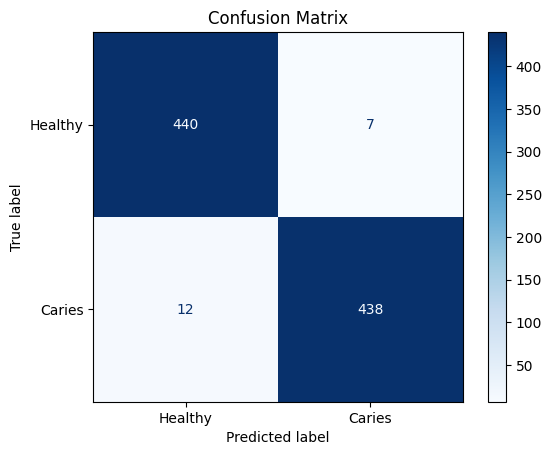

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    return np.array(all_labels), np.array(all_predictions)


true_labels, predictions = evaluate_model(model, test_loader)


cm = confusion_matrix(true_labels, predictions, labels=[0, 1])


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Caries"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


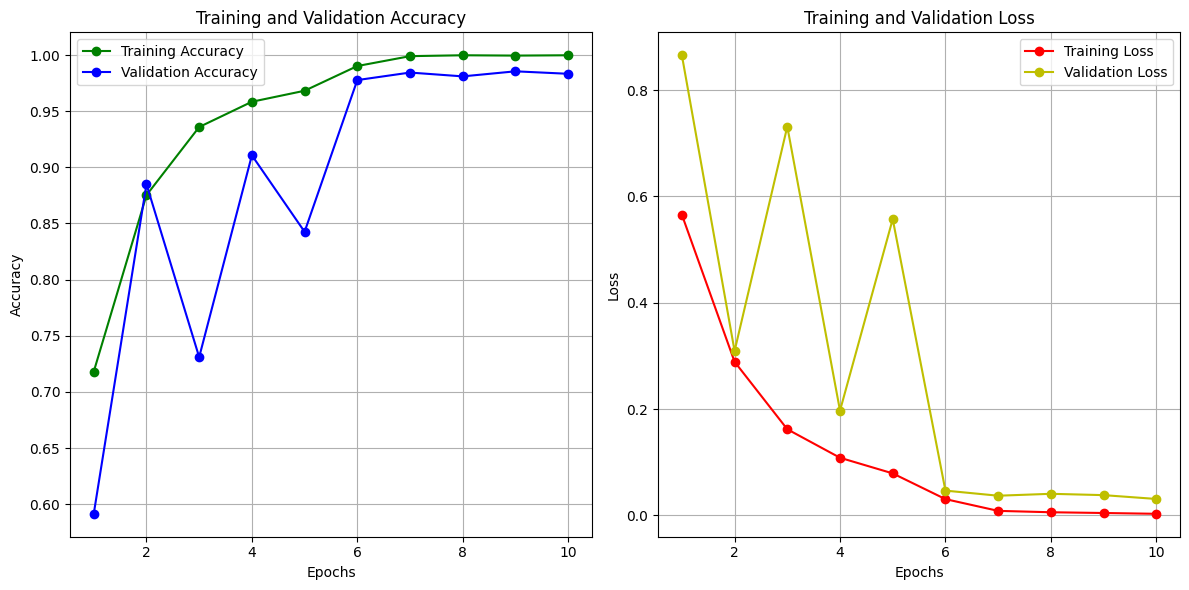

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, 11))
train_accuracies = [0.7181, 0.8752, 0.9359, 0.9584, 0.9682, 0.9902, 0.9990, 0.9998, 0.9995, 0.9998]
val_accuracies = [0.5915, 0.8850, 0.7310, 0.9107, 0.8426, 0.9777, 0.9844, 0.9810, 0.9855, 0.9833]

train_losses = [0.5656, 0.2890, 0.1621, 0.1085, 0.0791, 0.0307, 0.0086, 0.0060, 0.0046, 0.0031]
val_losses = [0.8655, 0.3093, 0.7314, 0.1971, 0.5573, 0.0467, 0.0371, 0.0407, 0.0382, 0.0310]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, 'g-o', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'b-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'r-o', label='Training Loss')
plt.plot(epochs, val_losses, 'y-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(true_labels, (probabilities > 0.5).astype(int))
precision = precision_score(true_labels, (probabilities > 0.5).astype(int))
recall = recall_score(true_labels, (probabilities > 0.5).astype(int))
f1 = f1_score(true_labels, (probabilities > 0.5).astype(int))


print("\nModel Performance Metrics:")
print("="*40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("="*40)



Model Performance Metrics:
Accuracy:  0.9788
Precision: 0.9843
Recall:    0.9733
F1-Score:  0.9788


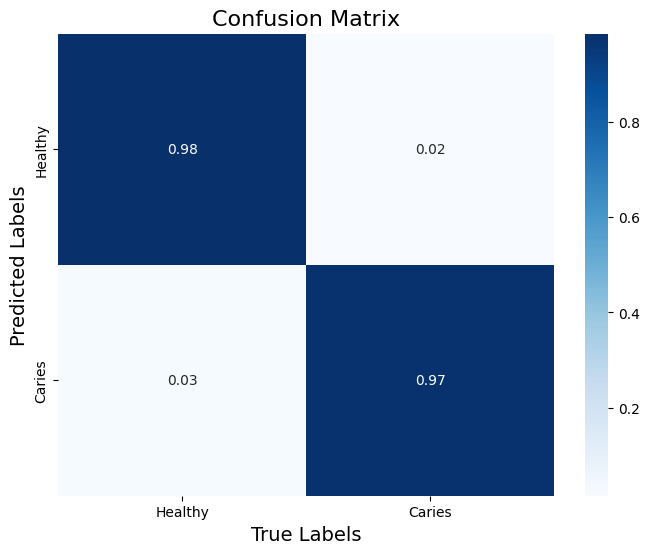

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(true_labels, (probabilities > 0.5).astype(int), normalize='true')


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Healthy", "Caries"], yticklabels=["Healthy", "Caries"])
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("True Labels", fontsize=14)
plt.ylabel("Predicted Labels", fontsize=14)
plt.show()
